In [2]:
import pandas as pd 
import numpy as np
from color_util import *
from PIL import Image
from sklearn.cluster import KMeans
from IPython.display import display
import matplotlib.pyplot as plt
import time
import pickle
import umap
from sklearn.cluster import DBSCAN

In [3]:
pkl_file = open('color_vs_month_sample_2018_10pc.pkl', 'rb')
color= pickle.load(pkl_file)
pkl_file.close()


In [8]:
dat=color['2019/10']

In [9]:
dat.shape

(477, 4)

4


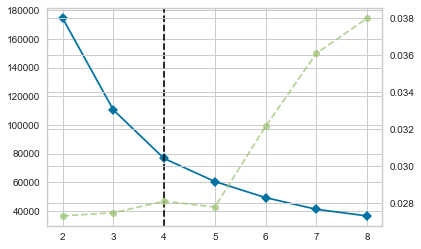

In [71]:
def kmeans_op(image,Nrange=(2,9),weight=None):
    k=kmeans_find_n_cluster(image,Nrange,weight=weight)
    print(k)
    if k:
    	colors=kmeans_simple_cluster(image,nc=k,weight=weight)
    else:
    	colors=kmeans_simple_cluster(image,nc=4,weight=weight)
    return colors

def kmeans_find_n_cluster(image,Nrange=(2,9),weight=None):
	model = KMeans()
	visualizer = KElbowVisualizer(model,
                                  k=Nrange,showbool=False)
	visualizer.fit(image,sample_weight=weight) 

	if visualizer.elbow_value_:
		return visualizer.elbow_value_
	else: 
		print(" ")
		print("no good number of cluster")
		##file_object = open('cluster_error_patID.txt', 'a')
		#file_object.write()
		#file_object.close()
		return False
    
%matplotlib inline
c=kmeans_op(dat[:,:3],weight=dat[:,3]*100)

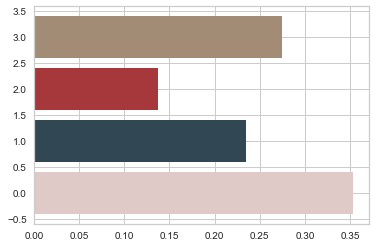

True

In [72]:
def color_visualizer(colors):
    count=colors[:,3]
    colors=colors[:,:3]
    plt.barh(np.arange(len(count)),count,color=colors/255.)
    plt.show()
    return True

color_visualizer(c)

4


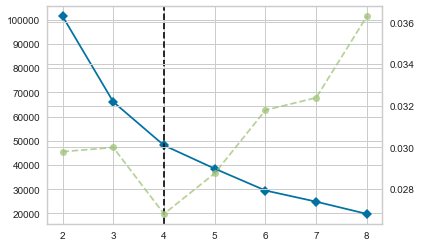

In [112]:
dat=color['2019/12']
c=kmeans_op(dat[:,:3],weight=dat[:,3]*100)



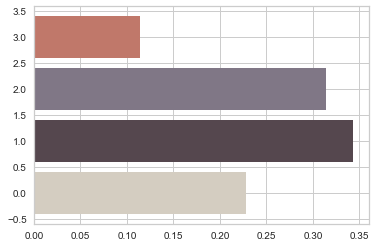

True

In [113]:
color_visualizer(c)

In [10]:
import umap


In [17]:
fit = umap.UMAP(n_neighbors=5)
#%time u = fit.fit_transform(dat[:,:3],weight)

In [11]:

new_data=np.empty((0,3))
for i in dat:
    weight=i[3]*200
    noise=np.random.normal(size=3)*5
    row=i[:3].reshape((1,3))+noise
    for j in range(int(weight)):
        new_data=np.append(new_data,row,axis=0)

In [19]:
 u = fit.fit_transform(new_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small a

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small a

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small a

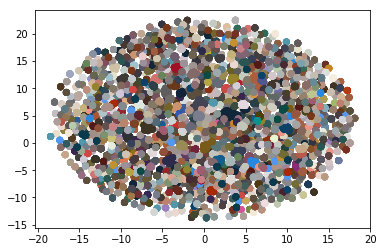

In [20]:
plt.scatter(u[:,0], u[:,1], c=new_data/255.)


In [97]:
dat.shape



(51, 4)